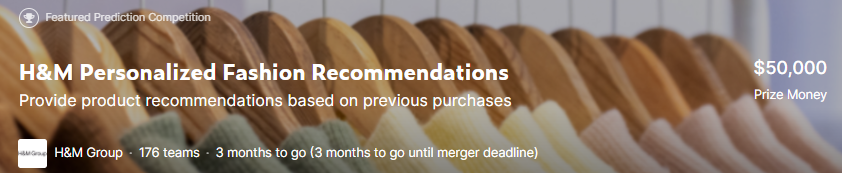

このチャレンジでは、サポートするメタデータとともに、時間の経過に伴う顧客の購入履歴が提供されます。あなたの課題は、トレーニングデータが終了した直後の7日間に各顧客が購入する記事を予測することです。その間に購入しなかった顧客は、スコアリングから除外されます。

 Your challenge is to predict what articles each customer will purchase in the 7-day period immediately after the training data ends. Customer who did not make any purchase during that time are excluded from the scoring.

<span style="color: orange; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">Import</span>

In [ ]:
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob
import os
import gc
import seaborn as sns
from tqdm.notebook import tqdm
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
train =True

<span style="color: orange; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">Data Read/Analize</span>

In [ ]:
train = pd.read_csv('../input/h-and-m-personalized-fashion-recommendations/transactions_train.csv')
train

### Trainデータにあるcustomer_idは136万件。一方でcustomer.csvには137万件あります。１万件がtrainデータに表れていないようです。

### There are 1.36 million customer_ids in the train data, while there are 1.37 million in customer.csv. There are 1.36 million customer_ids in the train data and 1.37 million in customer.csv. 10,000 are not represented in the train data.

In [ ]:
len(train.customer_id.unique())

### article_idもtrain,articlesで若干数がことなります。

### article_id is also slightly different for train and articles.

In [ ]:
len(train.article_id.unique())

### ほとんどのpriceの値は0.1以下になっています。

### Most of the PRICE values are less than 0.1.

In [ ]:
train.price.hist()
plt.gcf().set_size_inches(10, 10)

### データ量が多いので最初の１万件だけ見てみます。

### I'll just look at the first 10,000 because it's a lot of data.

In [ ]:
data = train[:10000]
sns.relplot(x=data.index, y='price', data=data, kind='line',ci='sd')
plt.gcf().set_size_inches(20, 10)
plt.show()

### sales_channel_idは、1,2のいづれかになるようです。

### sales_channel_id can be either 1 or 2.

In [ ]:
train.sales_channel_id.unique()

In [ ]:
articles = pd.read_csv('../input/h-and-m-personalized-fashion-recommendations/articles.csv')
articles

### それぞれのカラムでユニークな数を数えてみる。

### Count the number of unique in each column.

In [ ]:
for i in articles.columns:
    print(len(articles[i].unique()),i)

In [ ]:
customers = pd.read_csv('../input/h-and-m-personalized-fashion-recommendations/customers.csv')
customers

In [ ]:
customers.describe()

### それぞれのカラムでユニークな数を数えてみる。

### Count the number of unique in each column.

In [ ]:
for i in customers.columns:
    print(len(customers[i].unique()),i)

<span style="color: orange; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">Submittion</span>

### ここで指定された顧客ごとにどんなarticle_idを7日間で購入するのか予想することがこのタスクになります。

### This task is to predict what article_id will be purchased in 7 days for each customer specified here.

In [ ]:
sub = pd.read_csv('../input/h-and-m-personalized-fashion-recommendations/sample_submission.csv')
sub

### article_idに対する画像を見てみる。

### Take a look at the image for article_id.


In [ ]:
import cv2
fig = plt.figure(figsize=(30,15))
for i in range(12):
  fig.add_subplot(2,6, i+1)
  id = str(articles.loc[i,'article_id']).zfill(10)
  a = cv2.imread('../input/h-and-m-personalized-fashion-recommendations/images/'+str(id[:3])+'/'+str(id)+'.jpg')
  plt.title(id,fontsize=18)
  plt.imshow(a)